# Hayk Nalchajyan

## Linear regression

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [46]:
data = pd.read_csv("HousePrices_HalfMil.csv")
data.head()

,Area,Garage,FirePlace,Baths,White Marble,Black Marble,Indian Marble,Floors,City,Solar,Electric,Fiber,Glass Doors,Swiming Pool,Garden,Prices
0,164,2,0,2,0,1,0,0,3,1,1,1,1,0,0,43800
1,84,2,0,4,0,0,1,1,2,0,0,0,1,1,1,37550
2,190,2,4,4,1,0,0,0,2,0,0,1,0,0,0,49500
3,75,2,4,4,0,0,1,1,1,1,1,1,1,1,1,50075
4,148,1,4,2,1,0,0,1,2,1,0,0,1,1,1,52400


In [5]:
data.shape

(500000, 16)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype
---  ------         --------------   -----
 0   Area           500000 non-null  int64
 1   Garage         500000 non-null  int64
 2   FirePlace      500000 non-null  int64
 3   Baths          500000 non-null  int64
 4   White Marble   500000 non-null  int64
 5   Black Marble   500000 non-null  int64
 6   Indian Marble  500000 non-null  int64
 7   Floors         500000 non-null  int64
 8   City           500000 non-null  int64
 9   Solar          500000 non-null  int64
 10  Electric       500000 non-null  int64
 11  Fiber          500000 non-null  int64
 12  Glass Doors    500000 non-null  int64
 13  Swiming Pool   500000 non-null  int64
 14  Garden         500000 non-null  int64
 15  Prices         500000 non-null  int64
dtypes: int64(16)
memory usage: 61.0 MB


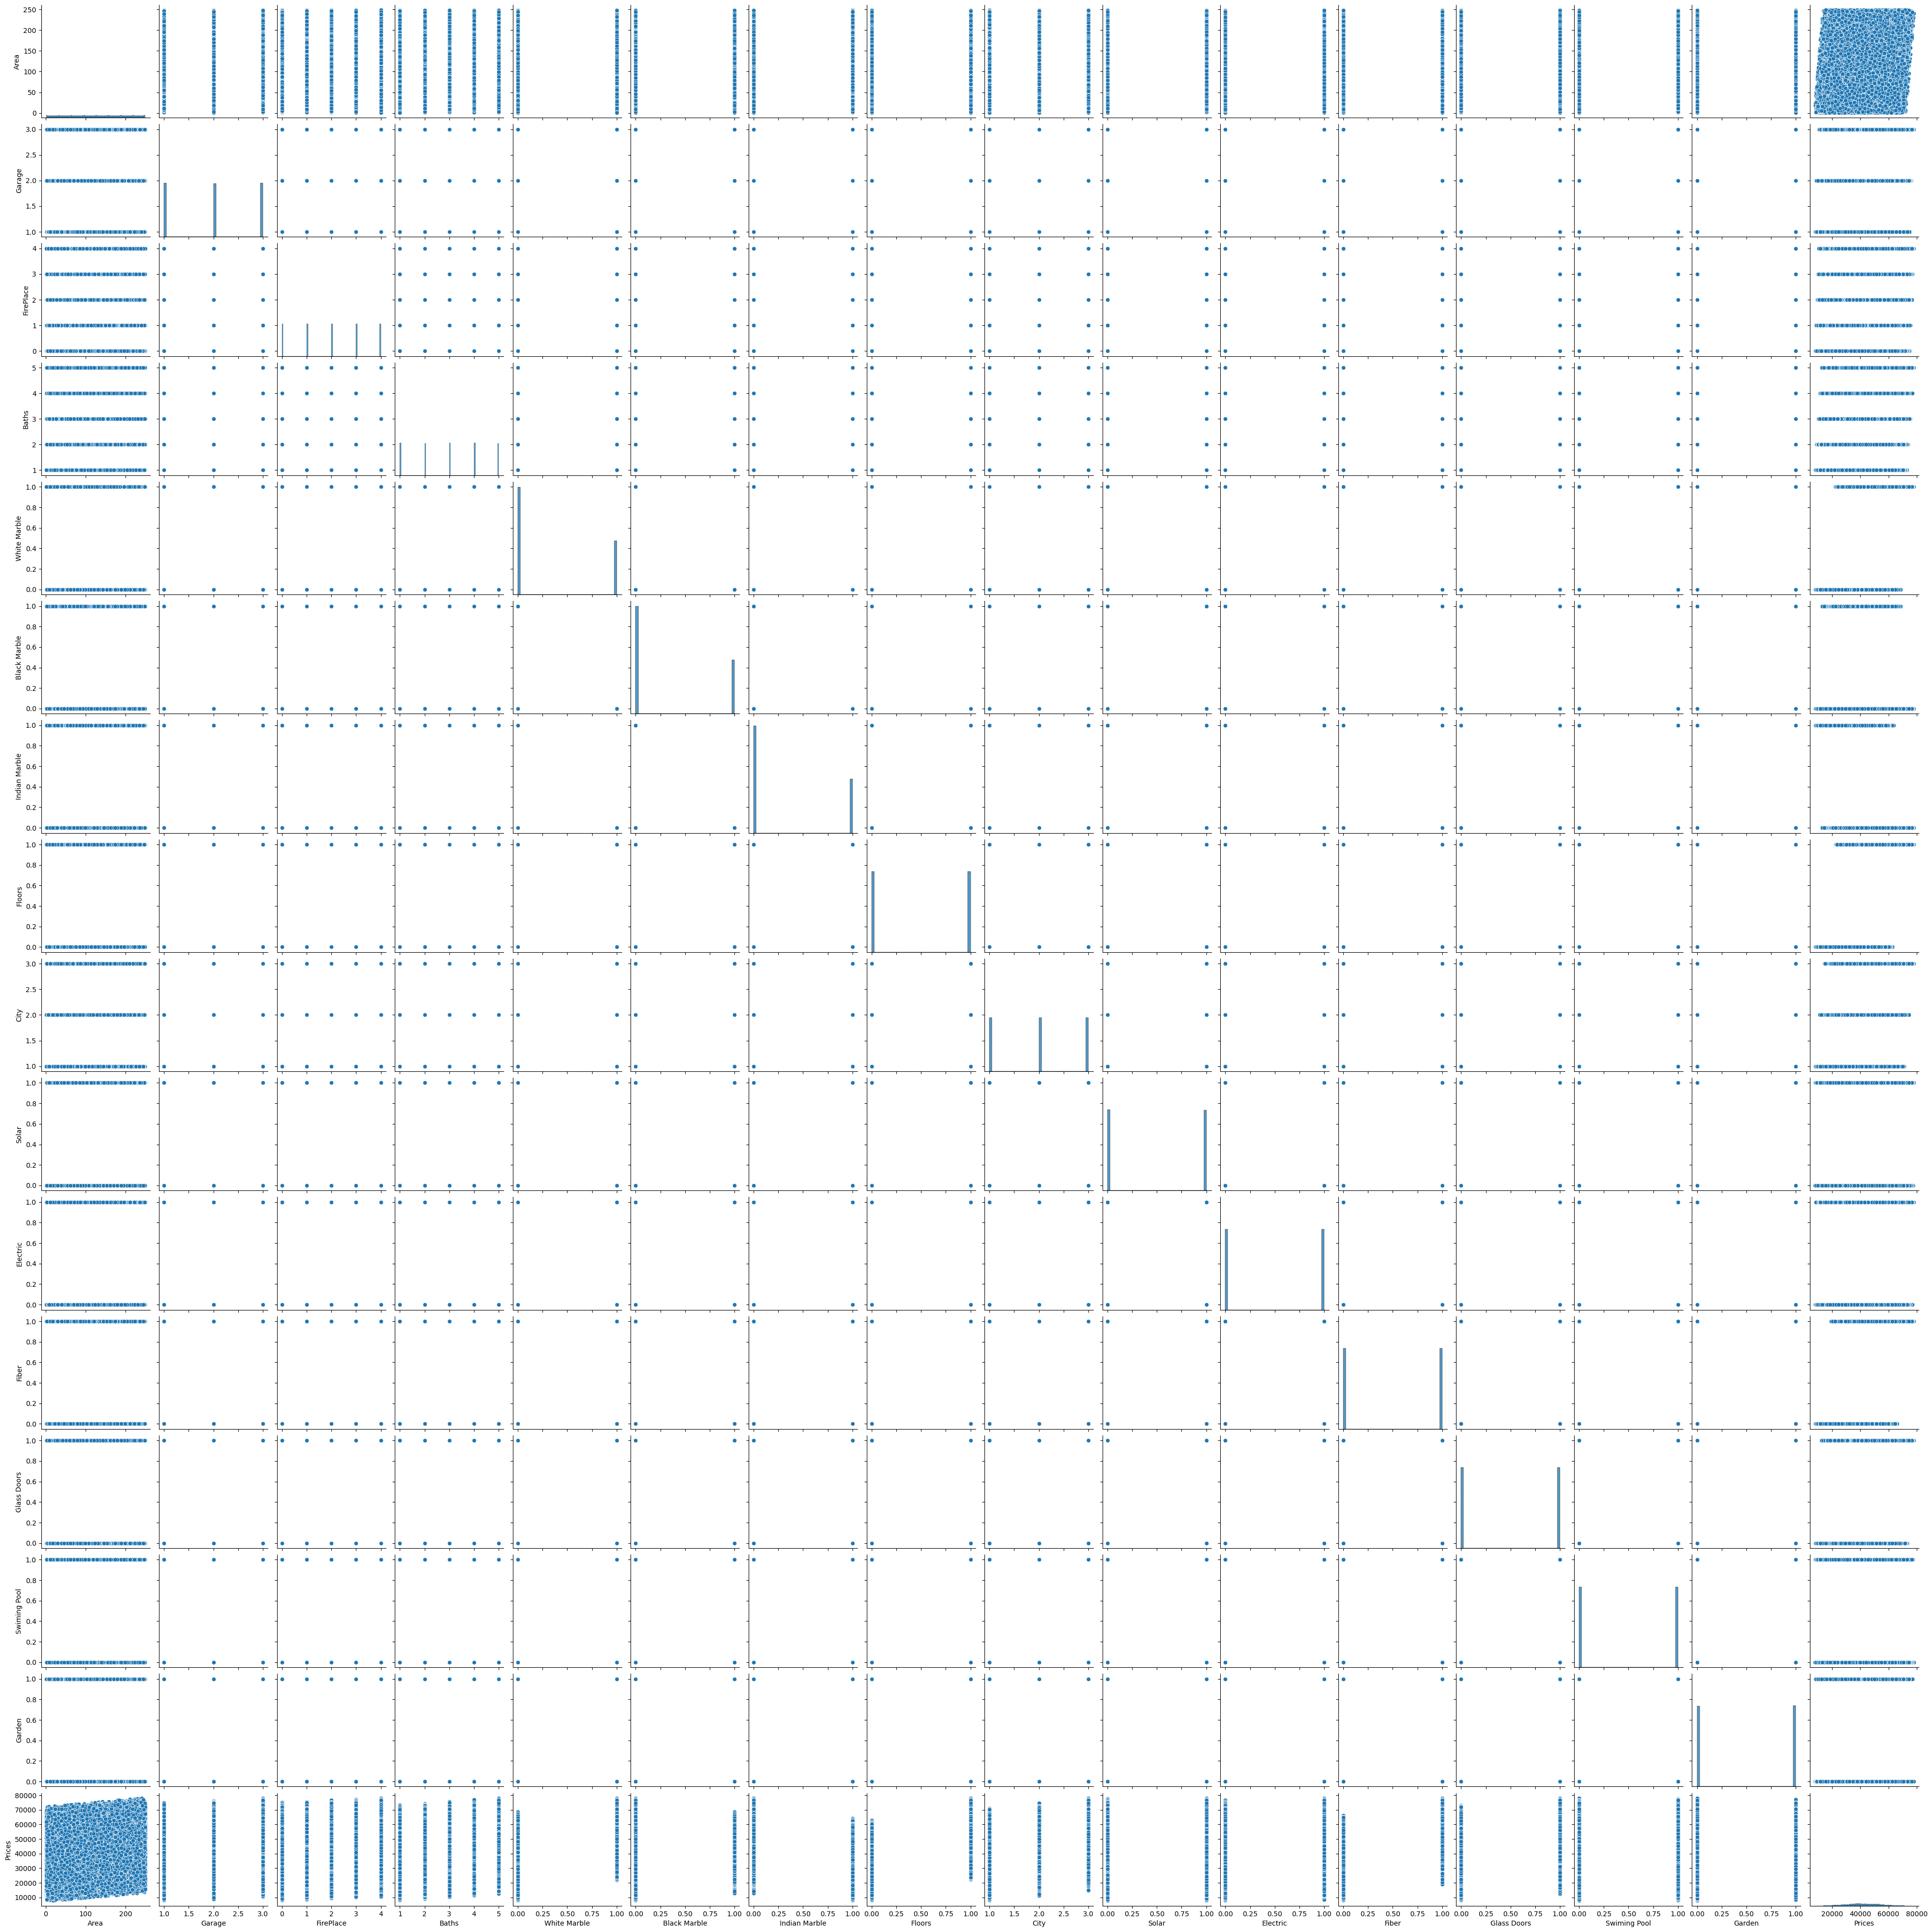

In [37]:
sns.pairplot(data)

In [11]:
target = data["Prices"]
new_data = data.drop(columns=["Prices"])
new_data.shape, target.shape

((500000, 15), (500000,))

In [19]:
X_train, X_test, y_train, y_test = train_test_split(new_data, target, train_size=0.9, random_state=42)

In [20]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [21]:
model.coef_, model.intercept_

(array([ 2.50000000e+01,  1.50000000e+03,  7.50000000e+02,  1.25000000e+03,
         7.66666667e+03, -1.33333333e+03, -6.33333333e+03,  1.50000000e+04,
         3.50000000e+03,  2.50000000e+02,  1.25000000e+03,  1.17500000e+04,
         4.45000000e+03,  6.05454378e-12, -3.36559223e-12]),
 7333.333333333459)

In [22]:
y_pred = model.predict(X_test)

In [38]:
mse = mean_squared_error(y_test, y_pred)
mse

3.514822440763578e-21

In [39]:
R_squared = r2_score(y_test, y_pred)
R_squared

1.0

## Logistic regressions

In [6]:
iris = sns.load_dataset("iris")

In [7]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### KNN

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [9]:
work_iris = iris.drop(columns=["species"])
target = iris["species"]
work_iris.shape, target.shape

((150, 4), (150,))

In [10]:
X_train, X_test, y_train, y_test =  train_test_split(work_iris, target, train_size=0.8, random_state=42)

In [11]:
knn= KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [12]:
y_pred = knn.predict(X_test)
y_pred_train = knn.predict(X_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [13]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n      setosa       1.00      1.00      1.00        10\n  versicolor       1.00      1.00      1.00         9\n   virginica       1.00      1.00      1.00        11\n\n    accuracy                           1.00        30\n   macro avg       1.00      1.00      1.00        30\nweighted avg       1.00      1.00      1.00        30\n'

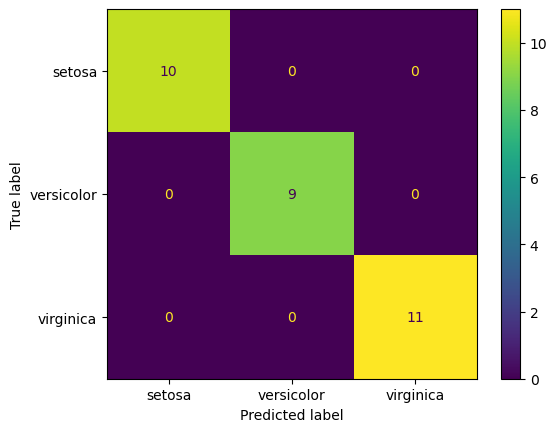

In [14]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [15]:
y_test.shape

(30,)

In [16]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

### Desicion Tree

In [17]:
orig_diamonds = sns.load_dataset("diamonds")

In [18]:
orig_diamonds.head(), orig_diamonds.shape

NameError: name 'diamonds' is not defined

In [ ]:
orig_diamonds.info()

In [152]:
orig_diamonds["cut"].unique()

['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']
Categories (5, object): ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']

In [153]:
target = orig_diamonds["cut"]
diamonds = orig_diamonds.drop(columns=["cut", "color", "clarity"])

In [154]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
target = encoded_data = encoder.fit_transform(target)
diamonds.shape, target.shape

((53940, 7), (53940,))

In [155]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [156]:
tree_model = DecisionTreeClassifier(max_depth=10, criterion="entropy")

In [157]:
tree_model.fit(diamonds, target)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

[Text(0.5607354365315852, 0.9545454545454546, 'table <= 57.15\nentropy = 1.981\nsamples = 53940\nvalue = [1610, 4906, 21551, 13791, 12082]\nclass = Good'),
 Text(0.323795068533969, 0.8636363636363636, 'depth <= 63.05\nentropy = 1.422\nsamples = 29742\nvalue = [643, 1902, 20345, 1694, 5158]\nclass = Good'),
 Text(0.17973405840286055, 0.7727272727272727, 'depth <= 62.75\nentropy = 0.981\nsamples = 25757\nvalue = [27, 149, 20275, 1694, 3612]\nclass = Good'),
 Text(0.0881629916567342, 0.6818181818181818, 'depth <= 60.05\nentropy = 0.905\nsamples = 23986\nvalue = [25, 129, 19520, 1488, 2824]\nclass = Good'),
 Text(0.031436233611442196, 0.5909090909090909, 'depth <= 58.45\nentropy = 1.849\nsamples = 865\nvalue = [13, 62, 337, 140, 313]\nclass = Good'),
 Text(0.01400476758045292, 0.5, 'depth <= 58.05\nentropy = 1.736\nsamples = 59\nvalue = [9, 33, 1, 11, 5]\nclass = Premium'),
 Text(0.005363528009535161, 0.4090909090909091, 'depth <= 55.25\nentropy = 1.258\nsamples = 37\nvalue = [8, 26, 1, 1,

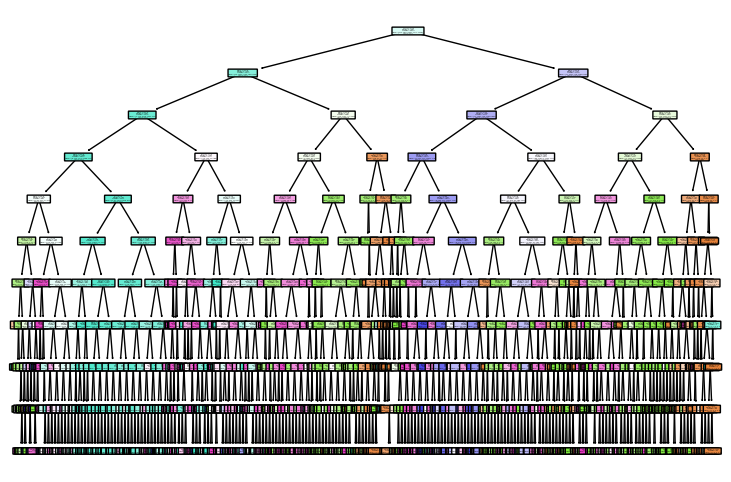

In [162]:
plt.figure(figsize=(9, 6))

plot_tree(tree_model, 
          feature_names=diamonds.columns,
          class_names=orig_diamonds["cut"].unique(), 
          rounded=True, 
          filled=True)

In [163]:
X_train, X_test, y_train, y_test = train_test_split(diamonds, target, train_size=0.8, random_state=42)

In [166]:
from sklearn.metrics import accuracy_score

train_accuracy = accuracy_score(y_train, tree_model.predict(X_train))
test_accuracy = accuracy_score(y_test, tree_model.predict(X_test))

In [167]:
train_accuracy, test_accuracy

(0.762537078235076, 0.7662217278457546)

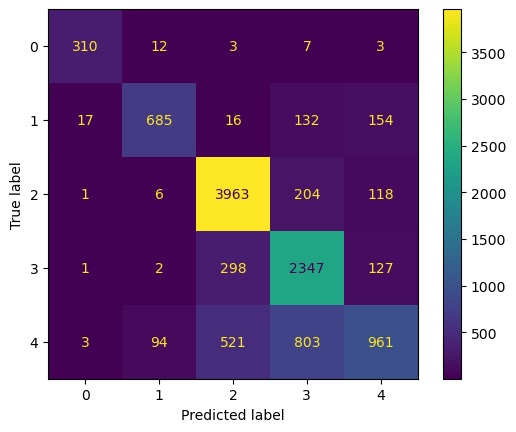

In [169]:
ConfusionMatrixDisplay.from_predictions(y_test, tree_model.predict(X_test))

### SVM

In [2]:
from sklearn.svm import SVC

In [3]:
svm_target = orig_diamonds["cut"]
X_train, X_test, y_train, y_test = train_test_split(diamonds, svm_target, test_size=0.2, random_state=42)

NameError: name 'orig_diamonds' is not defined

In [ ]:
svm_model = SVC(kernel="linear")
svm_model.fit(X_train, y_train)

In [ ]:
y_pred = svm_model(X_test)

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

### Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(diamonds, target, train_size=0.8, random_state=42)

In [ ]:
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

In [ ]:
y_pred = logreg_cmodel.predict(X_test)

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
accuracy